In [2]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import json

sns.set()

In [3]:
df = pd.read_csv("assignment_plans/large_market_plans/dist10_maxfrl1_alpha0.5_card0_umodelavg/menus.csv")
# df = pd.read_csv("assignment_plans/large_market_plans/dist4_maxfrl0.6_alpha1_card0/menus.csv")

In [4]:
ref = pd.read_csv("klm_raw_inputs/program_idxs.csv")
idx2id = dict(zip(ref.program_idx, ref.program_id))
id2idx = dict(zip(ref.program_id, ref.program_idx))

In [60]:
ref2 = pd.read_csv("klm_raw_inputs/typecodes.csv", index_col=0)[
    ["census_blockgroup", "lang_match"]
]
type2def = {typecode: f"{row.lang_match}-{row.census_blockgroup}" for typecode, row in ref2.iterrows()}
def2type = {f"{row.lang_match}-{row.census_blockgroup}": typecode for typecode, row in ref2.iterrows()}

In [6]:
df = df.merge(ref2, how="left", left_on="Type", right_on="type_code")

In [7]:
df

Type      Prob      Value    0    1    2    3    4    5    6  ...  152  \
0        0  0.294966  25.431007  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0   
1        0  0.705034  47.025857  1.0  1.0  0.0  1.0  1.0  1.0  0.0  ...  1.0   
2        1  1.000000  44.143047  0.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  0.0   
3        2  0.713586  38.923021  0.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  1.0   
4        2  0.103994  38.781511  0.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  1.0   
...    ...       ...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1761   927  0.572700  33.915943  0.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  0.0   
1762   928  0.723645  47.088369  0.0  1.0  0.0  1.0  1.0  1.0  0.0  ...  1.0   
1763   928  0.276355  23.813006  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1764   929  1.000000  47.972622  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1765   930  1.000000  46.356069  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

      153  154  155  156  157  158  159  census_blockgroup  lang_match  
0     0.0  0.0  0.0  0.0  0.0  0.0  1.0        60750101001    no_match  
1     1.0  0.0  1.0  1.0  1.0  1.0  1.0        60750101001    no_match  
2     0.0  0.0  0.0  0.0  0.0  0.0  1.0        60750101002   cantonese  
3     1.0  0.0  0.0  0.0  1.0  1.0  1.0        60750101002    no_match  
4     1.0  0.0  0.0  0.0  0.0  1.0  1.0        60750101002    no_match  
...   ...  ...  ...  ...  ...  ...  ...                ...         ...  
1761  0.0  0.0  0.0  0.0  0.0  0.0  1.0        60759805011    no_match  
1762  1.0  0.0  1.0  1.0  1.0  1.0  1.0        60759806001    no_match  
1763  0.0  0.0  0.0  0.0  0.0  0.0  1.0        60759806001    no_match  
1764  0.0  0.0  0.0  0.0  0.0  0.0  1.0        60759806001     spanish  
1765  0.0  0.0  0.0  0.0  0.0  0.0  1.0        60759809001    no_match  

[1766 rows x 164 columns]

In [14]:
tmp = df.drop(columns=["159"])
for col in range(159):
    if col == 111: continue
    tmp.loc[:, str(col)] = tmp[str(col)] * tmp.Prob
type_avg = tmp.groupby(["Type", "lang_match", "census_blockgroup"], as_index=False).sum()

In [15]:
type_avg.describe()

Type  census_blockgroup          Prob       Value           0  \
count  931.000000       9.310000e+02  9.310000e+02  931.000000  931.000000   
mean   465.000000       6.075033e+10  1.000000e+00   71.103350    0.256613   
std    268.900849       7.725088e+05  3.848708e-14   22.136840    0.314522   
min      0.000000       6.075010e+10  1.000000e+00   41.379472    0.000000   
25%    232.500000       6.075018e+10  1.000000e+00   57.924032    0.000000   
50%    465.000000       6.075026e+10  1.000000e+00   68.210534    0.000000   
75%    697.500000       6.075033e+10  1.000000e+00   80.314496    0.636811   
max    930.000000       6.075981e+10  1.000000e+00  301.264019    0.805451   

                1           2           3           4           5  ...  \
count  931.000000  931.000000  931.000000  931.000000  931.000000  ...   
mean     0.412256    0.205458    0.415957    0.436636    0.505461  ...   
std      0.342615    0.292546    0.342782    0.392026    0.415960  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
50%      0.539164    0.000000    0.548351    0.521165    0.663963  ...   
75%      0.722488    0.522272    0.725537    0.777862    0.993649  ...   
max      0.876980    0.762641    0.881317    1.000000    1.000000  ...   

              149         150         151         152         153         154  \
count  931.000000  931.000000  931.000000  931.000000  931.000000  931.000000   
mean     0.359035    0.445814    0.695451    0.395040    0.417046    0.072905   
std      0.338112    0.393971    0.411776    0.397047    0.409442    0.182553   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.248729    0.000000    0.000000    0.000000   
50%      0.414286    0.531956    1.000000    0.435220    0.500494    0.000000   
75%      0.693836    0.787563    1.000000    0.766467    0.801902    0.000000   
max      0.845243    1.000000    1.000000    1.000000    1.000000    0.717208   

              155         156         157         158  
count  931.000000  931.000000  931.000000  931.000000  
mean     0.321842    0.490308    0.363887    0.377981  
std      0.330567    0.344021    0.378706    0.390952  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.209136    0.654855    0.323062    0.329638  
75%      0.675112    0.766304    0.728965    0.754007  
max      0.824121    1.000000    1.000000    1.000000  

[8 rows x 162 columns]

In [9]:
# df.groupby("Type").agg(lambda x: list(x))
tmp = df.reset_index().groupby("Type").index.agg(indices=(lambda x: list(x)))
type2idxs = dict(zip(tmp.index, tmp.indices))

In [10]:
tmp = df.reset_index().groupby("Type").Prob.agg(probs=(lambda x: list(x)))
type2probs = {type2def[idx]: row.probs for idx, row in tmp.iterrows()}

In [11]:
type2probs

{'no_match-60750101001': [0.294965747532118, 0.705034252467882],
 'cantonese-60750101002': [1.0],
 'no_match-60750101002': [0.7135864759384214,
  0.1039944672099226,
  0.1824190568516559],
 'spanish-60750101002': [0.220358019349327, 0.7796419806506729],
 'no_match-60750102001': [1.0],
 'no_match-60750102002': [0.2618297381885657,
  0.2425061011102934,
  0.4956641607011409],
 'no_match-60750103001': [0.6704582560007213, 0.3295417439992787],
 'no_match-60750103002': [0.1935398465311025, 0.8064601534688974],
 'no_match-60750103003': [0.575908253120123,
  0.0740002935274619,
  0.0378070958246964,
  0.3122843575277359],
 'no_match-60750104001': [1.0],
 'no_match-60750104002': [0.2934227567081828, 0.7065772432918171],
 'no_match-60750104003': [0.251125337037998, 0.748874662962002],
 'no_match-60750105002': [0.365410932193307, 0.634589067806693],
 'no_match-60750106001': [0.1171114913906072, 0.8828885086093927],
 'cantonese-60750106002': [0.1036062955446605, 0.8963937044553395],
 'no_match-60

In [45]:
idx2menu = {}
for idx, row in df.iterrows():
    idx2menu[idx] = [idx2id[x] for x in range(159) if x != 106 and row[str(x)] == 1]

In [46]:
type2menu = {type2def[x]: [idx2menu[y] for y in type2idxs[x]] for x in type2def.keys()}

In [47]:
type2menu

{'no_match-60750101001': [['413-SA-KG',
   '420-MS-KG',
   '420-SE-KG',
   '420-SN-KG',
   '449-FB-KG',
   '449-GE-KG',
   '453-GE-KG',
   '453-SE-KG',
   '453-SN-KG',
   '456-GE-KG',
   '456-SB-KG',
   '476-NC-KG',
   '478-GE-KG',
   '478-JE-KG',
   '478-JN-KG',
   '478-MM-KG',
   '479-GE-KG',
   '479-KE-KG',
   '479-KN-KG',
   '481-GE-KG',
   '485-CE-KG',
   '485-CT-KG',
   '488-GE-KG',
   '490-CB-KG',
   '490-GE-KG',
   '493-GE-KG',
   '497-GE-KG',
   '497-SE-KG',
   '497-SN-KG',
   '505-GE-KG',
   '507-GE-KG',
   '509-CE-KG',
   '513-CB-KG',
   '513-GE-KG',
   '513-SB-KG',
   '521-GE-KG',
   '525-GE-KG',
   '537-MS-KG',
   '537-SE-KG',
   '537-SN-KG',
   '539-ED-KG',
   '539-GE-KG',
   '544-MS-KG',
   '549-GE-KG',
   '562-AF-KG',
   '562-CE-KG',
   '562-CN-KG',
   '562-GE-KG',
   '569-GE-KG',
   '575-GE-KG',
   '575-SA-KG',
   '575-SB-KG',
   '589-GE-KG',
   '593-GE-KG',
   '593-SB-KG',
   '603-DT-KG',
   '614-CB-KG',
   '614-GE-KG',
   '614-SB-KG',
   '618-SE-KG',
   '618-SN-KG',


In [8]:
path = os.path.expanduser('~/SFUSD/Census 2010_ Blocks for San Francisco/geo_export_d4e9e90c-ff77-4dc9-a766-6a1a7f7d9f9c.shp')
sf = gpd.read_file(path)
sf['geoid10'] = sf['geoid10'].fillna(value=0).astype('int64', copy=False)
tmp = pd.read_csv('~/Dropbox/SFUSD/Optimization/block_blockgroup_tract.csv')
tmp['Block'] = tmp['Block'].fillna(value=0).astype('int64', copy=False)
sf = sf.merge(tmp,how='left',left_on='geoid10',right_on='Block')
sf = sf.dissolve(by="BlockGroup", as_index=False)
sf = sf.to_crs('epsg:4326')

In [9]:
sch = pd.read_csv("/Users/katherinementzer/SFUSD/Data/Cleaned/schools_rehauled_1819.csv")
geo = [Point(xy) for xy in zip(sch['lon'], sch['lat'])]
sch = gpd.GeoDataFrame(sch, geometry=geo, crs='epsg:4326')

## Number of Menus per Student Type

In [16]:
df.groupby("Type").count().Prob.mean()

1.8968850698174007

## Expected Menu Size

In [18]:
df.loc[:, "num_options"] = df[[str(x) for x in range(159) if x != 111]].sum(axis=1) # removing one school that's filled with siblings

In [19]:
wm = lambda x: np.average(x, weights=df.loc[x.index, "Prob"])
num = df.groupby("Type").agg(avg_menu_size=("num_options", wm))

In [20]:
# percent of students who have no 
print(f"Percent of students are definitely unassigned: {(num.avg_menu_size == 0).mean():.1%}")

Percent of students are definitely unassigned: 0.0%


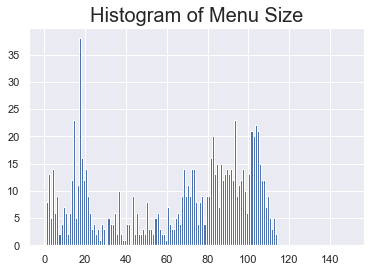

In [21]:
num.hist(bins=range(150))
plt.title("Histogram of Menu Size", fontsize=20)
plt.savefig("/Users/katherinementzer/Desktop/menu_size.png")

## Sample Menus

In [24]:
def plot_menu(row):
    tmp = pd.DataFrame(
        zip(
            [str(x) for x in range(159) if x != 111],
            row[[str(x) for x in range(159) if x != 111]].to_numpy(),
        ),
        columns=["prog_idx", "prob"],
    )
    tmp.loc[:, "program_id"] = tmp.prog_idx.apply(lambda x: idx2id[int(x)])
    tmp.loc[:, "school_id"] = tmp.program_id.apply(lambda x: int(x[:3]))
    tmp = tmp.merge(sch, how="left")
    colors = [(0, 0, 0, p) for p in tmp.prob]
    print(tmp.loc[tmp.prob > 0][["program_id", "school_name", "prob"]])

    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    sf.boundary.plot(ax=ax, alpha=0.4, color="gray", zorder=-1)
    sf.loc[sf.BlockGroup == row.census_blockgroup].plot(ax=ax, alpha=0.8, color="red")
    #     sch.loc[sch.school_id.isin(schools)].plot(ax=ax, markersize=200, marker="^", c="k")
    gpd.GeoDataFrame(tmp).plot(ax=ax, c=colors, markersize=100, marker="^")
    plt.title(
        f"{' '.join(row.lang_match.split('_')).title()} Census Block {row.census_blockgroup}",
        fontsize=20,
    )
    plt.show()

i =  371
    program_id           school_name      prob
1    413-SA-KG              Alamo ES  0.588321
3    420-MS-KG    Alvarado ES (TK-5)  0.588321
4    420-SE-KG    Alvarado ES (TK-5)  1.000000
5    420-SN-KG    Alvarado ES (TK-5)  1.000000
7    449-FB-KG  Carmichael (PK-TK-5)  0.588321
..         ...                   ...       ...
152  867-GE-KG         Vis Valley ES  1.000000
154  872-GE-KG               Chin ES  0.588321
155  876-CE-KG        West Portal ES  0.588321
156  876-CN-KG        West Portal ES  0.588321
157  876-GE-KG        West Portal ES  0.588321

[131 rows x 3 columns]


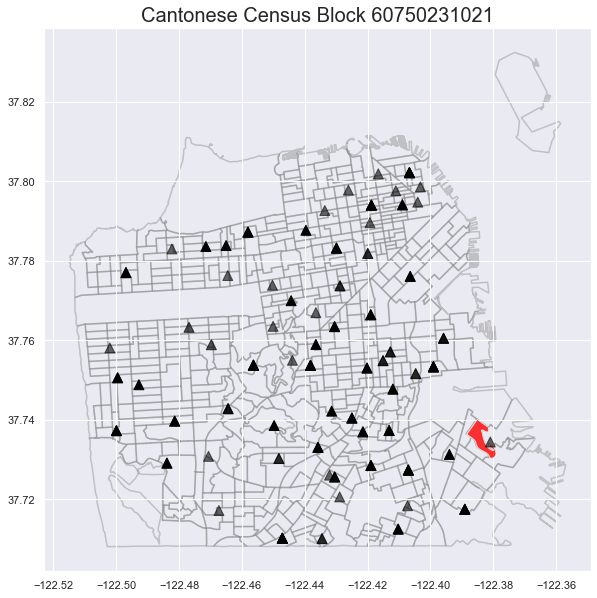

In [25]:
i = np.random.randint(0, len(type_avg))
i = 371
row = type_avg.iloc[i]
print("i = ",i)
plot_menu(row)

## Creating Home Based Menus for Simulation

In [11]:
st = pd.read_csv("~/SFUSD/Data/Cleaned/drop_optout_1819.csv", low_memory=False)
st = st.loc[st.grade == "KG"]
siblings = pd.read_csv("klm_raw_inputs/preassigned_siblings.csv")
df = pd.merge(st, siblings, on="studentno", how="outer", indicator=True)
df = df[df['_merge'] == 'left_only']

In [12]:
st = st.reset_index(drop=True)
stno2idx = dict(zip(st.studentno, st.index))

In [28]:
siblings = siblings.merge(st[["studentno", "sibling"]], how="left")
siblings.loc[:, "sibling"] = siblings.sibling.apply(lambda x: eval(x)[0])
siblings.loc[:, "program_id"] = [f"{x}-GE-KG" for x in siblings.sibling]

In [29]:
sibling_menus = {row.studentno: [row.program_id] for _, row in siblings.iterrows()}

In [30]:
sibling_menus

{10210006: ['729-GE-KG'],
 10210058: ['872-GE-KG'],
 10210137: ['509-GE-KG'],
 10210149: ['509-GE-KG'],
 10210160: ['676-GE-KG'],
 10210205: ['876-GE-KG'],
 10210214: ['834-GE-KG'],
 10210220: ['420-GE-KG'],
 10210221: ['485-GE-KG'],
 10210224: ['488-GE-KG'],
 10210228: ['714-GE-KG'],
 10210236: ['478-GE-KG'],
 10210243: ['801-GE-KG'],
 10210269: ['497-GE-KG'],
 10210305: ['413-GE-KG'],
 10210349: ['876-GE-KG'],
 10210407: ['435-GE-KG'],
 10210420: ['435-GE-KG'],
 10210423: ['664-GE-KG'],
 10210489: ['670-GE-KG'],
 10210529: ['876-GE-KG'],
 10210555: ['513-GE-KG'],
 10210583: ['589-GE-KG'],
 10210610: ['796-GE-KG'],
 10210669: ['862-GE-KG'],
 10210705: ['760-GE-KG'],
 10210721: ['862-GE-KG'],
 10210758: ['746-GE-KG'],
 10210853: ['723-GE-KG'],
 10210907: ['862-GE-KG'],
 10210912: ['746-GE-KG'],
 10210930: ['420-GE-KG'],
 10211041: ['746-GE-KG'],
 10211047: ['760-GE-KG'],
 10211048: ['505-GE-KG'],
 10211079: ['509-GE-KG'],
 10211117: ['876-GE-KG'],
 10211246: ['435-GE-KG'],
 10211275: [

In [39]:
df = df.dropna(subset=["census_blockgroup"])
df.census_blockgroup = df.census_blockgroup.astype(int)
df.loc[:, "lang_match"] = df.homelang_desc.apply(
    lambda x: "cantonese"
    if x == "CC-Chinese Cantonese"
    else ("spanish" if x == "SP-Spanish" else "no_match")
)
df["typecode"] = df.apply(lambda x: f"{x.lang_match}-{x.census_blockgroup}", axis=1)

In [38]:
10217845 in set(siblings.studentno)

False

In [40]:
type_avg["typecode"] = type_avg.apply(lambda x: f"{x.lang_match}-{x.census_blockgroup}", axis=1)
type_avg

Type lang_match  census_blockgroup  Prob      Value    0    1    2    3  \
0       0   no_match        60750101001   1.0  41.346888  0.0  0.0  0.0  0.0   
1       1  cantonese        60750101002   1.0  47.815392  0.0  0.0  0.0  0.0   
2       2   no_match        60750101002   1.0  37.878240  0.0  0.0  0.0  0.0   
3       3    spanish        60750101002   1.0  46.893184  0.0  1.0  0.0  1.0   
4       4   no_match        60750102001   1.0  48.426534  0.0  0.0  0.0  0.0   
..    ...        ...                ...   ...        ...  ...  ...  ...  ...   
926   926  cantonese        60759805011   1.0  49.859298  1.0  1.0  1.0  1.0   
927   927   no_match        60759805011   1.0  33.341804  0.0  0.0  0.0  0.0   
928   928   no_match        60759806001   1.0  41.572756  0.0  0.0  0.0  0.0   
929   929    spanish        60759806001   1.0  47.544628  0.0  0.0  0.0  0.0   
930   930   no_match        60759809001   1.0  47.523690  0.0  0.0  0.0  0.0   

       4  ...  150  151  152  153  154  155  156  157  158  \
0    1.0  ...  1.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   
1    1.0  ...  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0   
2    1.0  ...  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
3    0.0  ...  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
4    1.0  ...  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
926  0.0  ...  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0   
927  1.0  ...  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
928  1.0  ...  1.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   
929  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
930  1.0  ...  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                  typecode  
0     no_match-60750101001  
1    cantonese-60750101002  
2     no_match-60750101002  
3      spanish-60750101002  
4     no_match-60750102001  
..                     ...  
926  cantonese-60759805011  
927   no_match-60759805011  
928   no_match-60759806001  
929    spanish-60759806001  
930   no_match-60759809001  

[931 rows x 164 columns]

In [41]:
rest_menus = {
    row.typecode: [idx2id[x] for x in range(159) if x != 106 and row[str(x)] > 0]
    for _, row in type_avg.iterrows()
}
rest_menus = {row.studentno: rest_menus[row.typecode] for _, row in df.iterrows()}

In [42]:
rest_menus

{10210005: ['449-GE-KG',
  '478-GE-KG',
  '479-KE-KG',
  '507-GE-KG',
  '509-CE-KG',
  '513-CB-KG',
  '539-GE-KG',
  '562-CN-KG',
  '562-GE-KG',
  '575-SB-KG',
  '603-GE-KG',
  '603-SB-KG',
  '614-GE-KG',
  '644-GE-KG',
  '656-SB-KG',
  '664-GE-KG',
  '680-SE-KG',
  '723-SB-KG',
  '729-SE-KG',
  '729-SN-KG',
  '782-GE-KG',
  '786-GE-KG',
  '816-GE-KG',
  '838-GE-KG',
  '838-MN-KG',
  '838-SA-KG'],
 10210007: ['413-SA-KG',
  '420-MS-KG',
  '420-SE-KG',
  '420-SN-KG',
  '449-GE-KG',
  '453-GE-KG',
  '453-SE-KG',
  '453-SN-KG',
  '456-GE-KG',
  '476-NC-KG',
  '478-GE-KG',
  '478-JN-KG',
  '478-MM-KG',
  '479-KE-KG',
  '479-KN-KG',
  '481-GE-KG',
  '488-GE-KG',
  '490-CB-KG',
  '490-GE-KG',
  '497-GE-KG',
  '497-SE-KG',
  '497-SN-KG',
  '505-GE-KG',
  '507-GE-KG',
  '509-CE-KG',
  '513-CB-KG',
  '513-GE-KG',
  '513-SB-KG',
  '521-GE-KG',
  '525-GE-KG',
  '537-MS-KG',
  '537-SE-KG',
  '539-ED-KG',
  '539-GE-KG',
  '544-MS-KG',
  '549-GE-KG',
  '562-AF-KG',
  '562-CE-KG',
  '562-CN-KG',
  '5

In [43]:
menus = {**sibling_menus, **rest_menus}
# give students with missing census block groups access to all schools
for studentno in list(st.loc[st.census_blockgroup.isna()].studentno):
    menus[studentno] = list(ref.program_id)

In [37]:
save_path = "/Users/katherinementzer/Documents/sfusd/local_runs/Zones/peng_menu_all.json"
with open(save_path, "w") as f:
    json.dump(menus, f)

In [38]:
boost_matrix = np.zeros((4772, 159))

In [43]:
df.loc[:, "priority_idx"] = st.studentno.apply(lambda x: stno2idx[x])

In [46]:
type_avg = type_avg.set_index("typecode")

In [49]:
for idx, row in df.iterrows():
    for j in range(159):
        if j == 106:
            continue
        boost_matrix[row.priority_idx, j] = type_avg.loc[row.typecode, str(j)]

In [55]:
np.save(
    "/Users/katherinementzer/Documents/sfusd/local_runs/Data/Precomputed/peng_priority_boost_matrix.npy",
    boost_matrix,
)

In [61]:
# check that assigned school in menu
assignment = pd.read_csv("/Users/katherinementzer/Documents/sfusd/local_runs/assignments/peng_menus/Assignment_CTIP0_round_merged123_policypeng-menushome_based_peng_tiesSTB_iteration0.csv")
for idx, row in assignment.iterrows():
    if pd.isna(row.programcodes):
        continue
#     print(row.programcodes, menus[row.studentno])
    assert row.programcodes in menus[row.studentno]


In [10]:
with open("/Users/katherinementzer/Documents/sfusd/local_runs/Zones/peng_menu_dist10_maxfrl1_alpha0.5_card0_umodelavg.json", "r") as f:
    menus = json.load(f)

In [48]:
menus

{'10210006': ['729-SE-KG'],
 '10210058': ['872-GE-KG'],
 '10210137': ['509-CN-KG'],
 '10210149': ['509-CN-KG'],
 '10210160': ['676-GE-KG'],
 '10210205': ['876-GE-KG'],
 '10210214': ['834-CB-KG'],
 '10210220': ['420-SN-KG'],
 '10210221': ['485-CE-KG'],
 '10210224': ['488-GE-KG'],
 '10210228': ['714-SN-KG'],
 '10210236': ['478-JE-KG'],
 '10210243': ['801-GE-KG'],
 '10210269': ['497-GE-KG'],
 '10210305': ['413-GE-KG'],
 '10210349': ['876-CE-KG'],
 '10210407': ['435-GE-KG'],
 '10210420': ['435-GE-KG'],
 '10210423': ['664-GE-KG'],
 '10210489': ['670-GE-KG'],
 '10210529': ['876-CN-KG'],
 '10210555': ['513-CB-KG'],
 '10210583': ['589-GE-KG'],
 '10210610': ['796-GE-KG'],
 '10210669': ['862-GE-KG'],
 '10210705': ['760-GE-KG'],
 '10210721': ['862-GE-KG'],
 '10210758': ['746-ME-KG'],
 '10210853': ['723-CB-KG'],
 '10210907': ['862-CB-KG'],
 '10210912': ['746-GE-KG'],
 '10210930': ['420-GE-KG'],
 '10211041': ['746-GE-KG'],
 '10211047': ['760-SN-KG'],
 '10211048': ['505-GE-KG'],
 '10211079': ['509-C

## Check Demographics of Pre-Assigned Students

In [46]:
st.loc[:, "frl"] = st.freelunch_prob + st.reducedlunch_prob

In [47]:
sibs = siblings.merge(st[["studentno", "frl", "resolved_ethnicity"]])
sibs = pd.get_dummies(sibs, columns=["resolved_ethnicity"], prefix="", prefix_sep="")

In [48]:
# pd.set_option('display.max_rows', None)

In [49]:
sibs.groupby("program_id").mean().drop(columns=["studentno"]).join(
    sibs.groupby("program_id").agg(count=("studentno", "count"))
).sort_values("frl", ascending=False).head(15)

sibling       frl  American Indian or Alaskan Native     Asian  \
program_id                                                                   
525-GE-KG     525.0  0.880734                              0.000  0.000000   
830-GE-KG     830.0  0.813274                              0.125  0.000000   
449-GE-KG     449.0  0.804125                              0.000  0.052632   
490-GE-KG     490.0  0.797285                              0.000  0.866667   
859-GE-KG     859.0  0.779927                              0.000  0.071429   
625-GE-KG     625.0  0.753572                              0.000  0.000000   
521-GE-KG     521.0  0.747882                              0.000  0.000000   
456-GE-KG     456.0  0.745902                              0.000  0.000000   
603-GE-KG     603.0  0.739674                              0.000  0.000000   
453-GE-KG     453.0  0.737812                              0.000  0.000000   
507-GE-KG     507.0  0.727003                              0.000  0.250000   
481-GE-KG     481.0  0.723014                              0.000  0.000000   
872-GE-KG     872.0  0.722965                              0.000  0.909091   
834-GE-KG     834.0  0.713499                              0.000  0.444444   
867-GE-KG     867.0  0.703558                              0.000  0.428571   

            Black or African American  Decline to State  Filipino  \
program_id                                                          
525-GE-KG                    0.500000          0.500000  0.000000   
830-GE-KG                    0.750000          0.000000  0.000000   
449-GE-KG                    0.052632          0.052632  0.157895   
490-GE-KG                    0.000000          0.100000  0.000000   
859-GE-KG                    0.000000          0.142857  0.071429   
625-GE-KG                    0.500000          0.166667  0.000000   
521-GE-KG                    0.333333          0.000000  0.000000   
456-GE-KG                    0.000000          0.000000  0.000000   
603-GE-KG                    0.000000          0.000000  0.000000   
453-GE-KG                    0.166667          0.000000  0.166667   
507-GE-KG                    0.000000          0.500000  0.000000   
481-GE-KG                    0.071429          0.000000  0.071429   
872-GE-KG                    0.000000          0.000000  0.090909   
834-GE-KG                    0.000000          0.000000  0.000000   
867-GE-KG                    0.142857          0.000000  0.000000   

            Hispanic/Latino  Pacific Islander  Two or More Races  Vietnamese  \
program_id                                                                     
525-GE-KG          0.000000          0.000000           0.000000         0.0   
830-GE-KG          0.125000          0.000000           0.000000         0.0   
449-GE-KG          0.473684          0.000000           0.000000         0.0   
490-GE-KG          0.000000          0.000000           0.000000         0.0   
859-GE-KG          0.357143          0.000000           0.071429         0.0   
625-GE-KG          0.000000          0.166667           0.166667         0.0   
521-GE-KG          0.666667          0.000000           0.000000         0.0   
456-GE-KG          1.000000          0.000000           0.000000         0.0   
603-GE-KG          1.000000          0.000000           0.000000         0.0   
453-GE-KG          0.666667          0.000000           0.000000         0.0   
507-GE-KG          0.000000          0.000000           0.250000         0.0   
481-GE-KG          0.785714          0.000000           0.071429         0.0   
872-GE-KG          0.000000          0.000000           0.000000         0.0   
834-GE-KG          0.388889          0.000000           0.111111         0.0   
867-GE-KG          0.285714          0.071429           0.071429         0.0   

               White  count  
program_id                   
525-GE-KG   0.000000      2  
830-GE-KG   0.000000      8  
449-GE-KG   0.210526     19  


In [50]:
(sch.loc[sch.school_id == 525]).T

25
school_id                                              525
school_name                                 Cobb ES (PK-5)
school_name_long     Dr. William L. Cobb Elementary School
lat                                              37.787702
lon                                            -122.439627
zip                                                  94115
category                                        Attendance
grades                                           PK-TK-5th
cap_lb                                                  49
eng_scores_1819                                2379.823529
math_scores_1819                               2390.058824
greatschools_rating                                      2
ela_color                                           Yellow
math_color                                          Orange
chronic_color                                          Red
suspension_color                                    Yellow
MetStandards                                      0.145833
AvgColorIndex                                         2.25
attendance_area                                        525
Block                                       60750153001002
BlockGroup                                     60750153001
Tract                                         6075015300.0
geometry                     POINT (-122.439627 37.787702)

In [51]:
assignment = pd.read_csv("/Users/katherinementzer/Documents/sfusd/local_runs/assignments/peng_menus/Assignment_CTIP0_round_merged123_policypeng-menushome_based_peng_tiesSTB_iteration0.csv")

In [52]:
no_sib = pd.merge(assignment, siblings, on="studentno", how="outer", indicator=True)
no_sib = no_sib[no_sib['_merge'] == 'left_only']

In [53]:
no_sib = no_sib.merge(st[["studentno", "frl", "resolved_ethnicity"]])
no_sib = pd.get_dummies(no_sib, columns=["resolved_ethnicity"], prefix="", prefix_sep="")

In [54]:
no_sib.groupby("programcodes").mean().drop(columns=["studentno"]).join(
    no_sib.groupby("programcodes").agg(count=("studentno", "count"))
).sort_values("frl", ascending=False)[["frl", "count"]]

frl  count
programcodes                 
830-GE-KG     0.843603      9
834-CB-KG     0.795234      7
872-CB-KG     0.790648     22
650-SB-KG     0.786667      1
490-CB-KG     0.769521     46
...                ...    ...
722-AF-KG     0.065395      6
801-SA-KG     0.039216      3
449-FB-KG     0.020000      2
823-AF-KG     0.000000      2
478-MM-KG          NaN      1

[146 rows x 2 columns]

In [55]:
no_sib.groupby("programcodes").agg(non_sibling_count=("studentno", "count")).join(
    sibs.groupby("program_id").agg(sibling_count=("studentno", "count")),
    how="outer"
).fillna(0)

non_sibling_count  sibling_count
413-GE-KG               84.0           27.0
420-GE-KG               36.0           29.0
420-SE-KG               18.0            0.0
420-SN-KG               26.0            0.0
435-GE-KG               81.0           27.0
...                      ...            ...
872-CB-KG               22.0            0.0
872-GE-KG               14.0           11.0
876-CE-KG                9.0            0.0
876-CN-KG               18.0            0.0
876-GE-KG               33.0           39.0

[147 rows x 2 columns]

## Choice Model 

In [66]:
import sys 
sys.path.append("/Users/katherinementzer/code/optimal-allocation-sfusd/")
from peng.assignment_plans.generic.fixed_effect_utility import FixedEffectUtility
from peng.assignment_plans.optimization.fast_logit import FastLogit

In [67]:
util_param = FixedEffectUtility.sfusd2018K()
logit = FastLogit.fromUtilParam(util_param)

/Users/katherinementzer/code/optimal-allocation-sfusd/peng/assignment_plans/optimization/fast_logit.py:17: RuntimeWarning: invalid value encountered in reciprocal
  self._exp=np.exp(np.einsum('ij,i->ij', u, np.reciprocal(self._beta)))


In [68]:
type2idxs

{0: [0, 1],
 1: [2],
 2: [3],
 3: [4],
 4: [5, 6],
 5: [7],
 6: [8],
 7: [9],
 8: [10, 11],
 9: [12],
 10: [13],
 11: [14],
 12: [15],
 13: [16],
 14: [17],
 15: [18],
 16: [19, 20],
 17: [21],
 18: [22],
 19: [23],
 20: [24],
 21: [25],
 22: [26],
 23: [27, 28],
 24: [29],
 25: [30],
 26: [31],
 27: [32],
 28: [33],
 29: [34],
 30: [35],
 31: [36, 37],
 32: [38],
 33: [39],
 34: [40],
 35: [41],
 36: [42],
 37: [43],
 38: [44],
 39: [45],
 40: [46],
 41: [47],
 42: [48],
 43: [49],
 44: [50],
 45: [51],
 46: [52],
 47: [53, 54],
 48: [55, 56, 57],
 49: [58],
 50: [59],
 51: [60],
 52: [61, 62],
 53: [63],
 54: [64],
 55: [65],
 56: [66],
 57: [67],
 58: [68],
 59: [69],
 60: [70],
 61: [71],
 62: [72],
 63: [73],
 64: [74],
 65: [75],
 66: [76, 77],
 67: [78],
 68: [79],
 69: [80],
 70: [81],
 71: [82],
 72: [83],
 73: [84, 85],
 74: [86],
 75: [87],
 76: [88, 89],
 77: [90],
 78: [91],
 79: [92],
 80: [93],
 81: [94],
 82: [95],
 83: [96],
 84: [97],
 85: [98],
 86: [99],
 87: [100],

In [70]:
type_avg.head()

Type lang_match  census_blockgroup  Prob      Value    0    1    2    3  \
0     0   no_match        60750101001   1.0  96.111360  0.0  0.0  0.0  0.0   
1     1  cantonese        60750101002   1.0  49.051782  0.0  0.0  0.0  0.0   
2     2   no_match        60750101002   1.0  48.537394  0.0  0.0  0.0  0.0   
3     3    spanish        60750101002   1.0  48.265480  0.0  0.0  0.0  0.0   
4     4   no_match        60750102001   1.0  97.346578  0.0  0.0  0.0  0.0   

     4  ...  150  151  152  153  154  155  156  157  158  \
0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                typecode  
0   no_match-60750101001  
1  cantonese-60750101002  
2   no_match-60750101002  
3    spanish-60750101002  
4   no_match-60750102001  

[5 rows x 164 columns]

In [72]:
t2progidx = {x.Type: [i for i in range(159) if i != 106 and x[str(i)] > 0] for _, x in type_avg.iterrows()}

In [73]:
t2progidx

{0: [28, 51, 52, 54, 75, 127, 138],
 1: [27, 53, 74, 137, 154],
 2: [28, 51, 52, 54, 75, 127],
 3: [5, 52, 54, 75, 127, 139],
 4: [28, 42, 54, 75, 125, 127, 128, 135, 138],
 5: [28, 54, 125, 127, 128, 135, 138],
 6: [28, 54, 75, 127, 138],
 7: [28, 52, 54, 75, 127, 138],
 8: [28, 52, 54, 75, 125, 127, 138],
 9: [28, 51, 52, 54, 75, 125, 127, 138],
 10: [28, 51, 52, 54, 75, 127],
 11: [28, 51, 52, 54, 75, 127],
 12: [14, 28, 54, 127, 135, 155],
 13: [28, 51, 52, 54, 75, 127, 155],
 14: [27, 53, 74, 154],
 15: [14, 28, 52, 54, 127, 135, 155],
 16: [28, 51, 52, 54, 75, 125, 127, 135, 155],
 17: [27, 53, 74, 75, 137, 154],
 18: [27, 53, 74, 75, 137, 154],
 19: [52, 54, 75, 125, 127, 138, 149],
 20: [27, 53, 74, 75, 137, 154],
 21: [75],
 22: [27, 53, 74, 75, 137],
 23: [52, 54, 75, 127, 138, 149],
 24: [28, 54, 75, 125, 127, 138, 149],
 25: [27, 53, 74, 137, 154],
 26: [42, 52, 54, 75, 125, 127, 138, 149],
 27: [27, 53, 74, 137, 154],
 28: [28, 52, 54, 75, 122, 125, 127, 135, 138, 149, 155

In [95]:
t = 1
v, p = logit.vp(t, t2progidx[t])

In [96]:
p

array([0.14717112, 0.52149837, 0.04744825, 0.03124255, 0.25263971])

In [104]:
pidx = id2idx["490-GE-KG"]

In [92]:
ts = [t for t, m in t2progidx.items() if pidx in m]

In [90]:
t2probs = {x.Type: [x[str(i)] for i in range(159) if i != 106 and x[str(i)] > 0] for _, x in type_avg.iterrows()}

In [106]:
def get_prob(t, pidx):
    wp = np.multiply(logit.vp(t, t2progidx[t], pOnly=True), np.array(t2probs[t]))
    wp /= sum(wp)
    return wp[t2progidx[ts[0]].index(pidx)]

In [112]:
pick_probs = dict(zip(ts, [get_prob(t, pidx) for t in ts]))

In [126]:
frl = pd.read_csv("klm_raw_inputs/geocode_frl.csv")
cts = pd.read_csv("klm_raw_inputs/geocode_student_counts.csv")
frl = frl.merge(cts)
t2frl = dict(zip(frl.type_code, frl.frl * frl.student_count))
t2frl_uw = dict(zip(frl.type_code, frl.frl))
t2count = dict(zip(frl.type_code, frl.student_count))

In [125]:
sorted([t2frl[t] for t in ts])[::-1][:10]

[9.663716814159292,
 4.230769230769232,
 4.135135135135135,
 4.0588235294117645,
 3.6734693877550995,
 3.4392523364485963,
 2.5909090909090917,
 2.2727272727272747,
 2.0000000000000013,
 2.0]

In [114]:
sum([t2frl[t] * pick_probs[t] for t in ts])

16.626080893760754

In [116]:
sum([t2count[t] * pick_probs[t] for t in ts])

42.37643229749656

(array([36.,  4.,  2.,  5.,  7.,  2.,  2.,  0.,  1.,  3.]),
 array([0.01297477, 0.10232271, 0.19167065, 0.28101859, 0.37036653,
        0.45971446, 0.5490624 , 0.63841034, 0.72775828, 0.81710622,
        0.90645416]),
 <BarContainer object of 10 artists>)

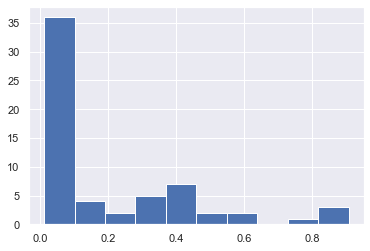

In [120]:
plt.hist(pick_probs.values())

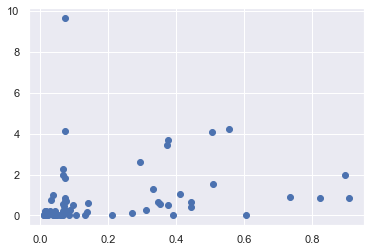

In [122]:
plt.scatter(pick_probs.values(), [t2frl[t] for t in ts])

In [131]:
sampled_frls = []
num_iters = 1000 
for i in range(num_iters):
    frl_count = 0
    for t in ts:
        num = np.random.binomial(t2count[t], pick_probs[t])
        frl_count += num * t2frl_uw[t]
    sampled_frls.append(frl_count)

(array([  1.,   9.,  47., 150., 202., 265., 203.,  93.,  26.,   4.]),
 array([ 8.74973798, 10.25201824, 11.75429849, 13.25657874, 14.758859  ,
        16.26113925, 17.76341951, 19.26569976, 20.76798001, 22.27026027,
        23.77254052]),
 <BarContainer object of 10 artists>)

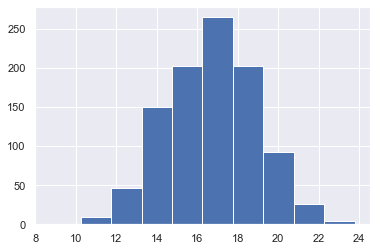

In [132]:
plt.hist(sampled_frls)

## Program Eligibility

In [31]:
pr = pd.read_csv("/Users/katherinementzer/SFUSD/Data/Cleaned/programs_1819.csv")

In [32]:
pr["category"] = pr.program_type.apply(lambda x: "SP" if x in ["SB", "SN"] else ("CC" if x in ["CB", "CN"] else "EN"))

In [33]:
new_caps = pd.read_csv("klm_raw_inputs/school_caps.csv")

In [34]:
pr = pr.merge(new_caps, on="program_id")

In [35]:
pr.groupby("category").sum()

Unnamed: 0  school_id  capacity  r2_capacity  r3_capacity  \
category                                                              
CC              1348       9937       400        398.0        398.0   
EN              9627      79701      4071       3742.0       3745.0   
SP              1586      13613       595        583.0        583.0   

          r1_assigned  r1_noenroll  r1_first_choice  max_seats  program_idx  \
category                                                                      
CC              372.0         27.0            361.0      292.0         1395   
EN             3918.0        934.0           3941.0     3775.0         9628   
SP              420.0         49.0            398.0      483.0         1538   

          remaining_cap  
category                 
CC                  261  
EN                 3042  
SP                  473

In [36]:
ct = pd.read_csv("klm_raw_inputs/geocode_student_counts.csv")

In [37]:
ct.groupby("lang_match").sum()

type_code  census_blockgroup  student_count
lang_match                                             
cantonese      108592     12393068624231            427
no_match       243023     32865931921831           2635
spanish         81300     11299558487229            494

In [41]:
def _make_program_type_lists(df):
    """ create column with each type of program applied to """
    for round in range(1, 3 + 1):
        # format column name
        col = "r{}_programs".format(round)
        # format round rankings
#         df[col] = df[col].fillna("")
        df[col] = df[col].apply(lambda x: eval(x) if not pd.isna(x) else [])

        if round == 1:
            df.loc[:, "program_types"] = df[col]
        else:
            df.loc[:, "program_types"] = df.apply(lambda x: x["program_types"] + x[col], axis=1)
    df["program_types"] = df["program_types"].apply(lambda x: list(set(x) - {np.nan}))
    return df

student_data = pd.read_csv("/Users/katherinementzer/SFUSD/Data/Cleaned/drop_optout_1819.csv")
student_data = student_data.loc[student_data.grade == "KG"]
homelang2prog = {
    "CC-Chinese Cantonese": ["CN", "CB"],
    "CM-Chinese Mandarin": ["MN"],
    "SP-Spanish": ["SN", "SB"],
    "KO-Korean": ["KN"],
    "CC": ["CN", "CB"],
    "CM": ["MN"],
    "SP": ["SN", "SB"],
    "KO": ["KN"],
}
if "program_types" not in student_data.columns:
    student_data = _make_program_type_lists(student_data)

homelang ="homelang_desc"

def combine(row):
    if row[homelang] in homelang2prog:
        both = homelang2prog[row[homelang]] + list(row["program_types"])
        return list(np.unique(both))
    return list(row["program_types"])

student_data["qualified"] = student_data.apply(combine, axis=1)

qualified_program_dict = dict(
    zip(student_data.index.values, student_data["qualified"])
)

In [42]:
student_data = student_data.dropna(subset=["census_blockgroup"]).reset_index(drop=True)
student_data.census_blockgroup = student_data.census_blockgroup.astype(int)
student_data.loc[:, "lang_match"] = student_data.homelang_desc.apply(
    lambda x: "cantonese"
    if x == "CC-Chinese Cantonese"
    else ("spanish" if x == "SP-Spanish" else "no_match")
)
student_data["comp"] = student_data.apply(lambda x: f"{x.qualified}-{x.lang_match}", axis=1)

In [43]:
student_data.comp.unique()

array(["['GE']-no_match", "['GE', 'SE', 'CE']-no_match",
       "['JE', 'GE', 'SE', 'CE', 'KE']-no_match",
       "['GE', 'SB', 'SN']-spanish", "['GE', 'CE']-no_match",
       "['SN']-no_match", "['CB', 'CE', 'CN', 'CT', 'GE']-cantonese",
       "['SB', 'SN']-spanish", "['GE', 'ME', 'CT', 'CE']-no_match",
       "['CN']-no_match", "['CB', 'CN', 'CT', 'GE']-cantonese",
       "['GE', 'MN']-no_match",
       "['JE', 'ME', 'GE', 'SE', 'CE', 'KE']-no_match",
       "['GE', 'SE', 'FB', 'JE']-no_match", "['GE', 'SE', 'JE']-no_match",
       "['CB', 'CN', 'GE']-cantonese", "['CE']-no_match",
       "['GE', 'ME', 'CE']-no_match", "['JE', 'SB', 'SN']-spanish",
       "['GE', 'CT']-no_match", "['CB', 'CN', 'GE', 'ME']-cantonese",
       "['CB', 'CN', 'CT', 'GE', 'ME']-cantonese",
       "['GE', 'SE']-no_match", "['CB', 'CN']-cantonese",
       "['GE', 'JE', 'CE', 'SE']-no_match", "['GE', 'MN', 'CE']-no_match",
       "['CB', 'GE', 'MN']-no_match", "['GE', 'ME', 'CE', 'JE']-no_match",
       "['G

In [44]:
student_data

studentno                                 r1_ranked_idschool  \
0      10210005                                         [435, 670]   
1      10210006                          [729, 537, 680, 876, 729]   
2      10210007  [786, 569, 735, 435, 549, 413, 589, 479, 718, ...   
3      10210010  [796, 420, 505, 722, 589, 618, 876, 718, 493, ...   
4      10210039           [537, 680, 691, 729, 493, 593, 820, 420]   
...         ...                                                ...   
4734  888021963                                                NaN   
4735  888021967                                                NaN   
4736  888022647                                                NaN   
4737  888022874                                                NaN   
4738  888022904                                                NaN   

                                        r1_listed_ranks  \
0                                                [1, 2]   
1                                       [1, 2, 3, 4, 5]   
2     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
3                       [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
4                              [1, 2, 3, 4, 5, 6, 7, 8]   
...                                                 ...   
4734                                                NaN   
4735                                                NaN   
4736                                                NaN   
4737                                                NaN   
4738                                                NaN   

                                            r1_programs grade  \
0                                              [GE, GE]    KG   
1                                  [SE, SE, SE, CE, GE]    KG   
2     [JE, GE, GE, GE, GE, GE, GE, GE, GE, GE, GE, S...    KG   
3              [GE, SE, GE, GE, GE, SE, CE, GE, GE, GE]    KG   
4                      [SN, SN, SB, SN, GE, SB, GE, SN]    KG   
...                                                 ...   ...   
4734                                                 []    KG   
4735                                                 []    KG   
4736                                                 []    KG   
4737                                                 []    KG   
4738                                                 []    KG   

                                        r1_randomnumber  \
0                [0.911005150211793, 0.111640986769763]   
1     [0.411758992402522, 0.331974906582103, 0.06240...   
2     [0.924068668432651, 0.591082980668961, 0.31875...   
3     [0.0774816984940387, 0.826669827283934, 0.8127...   
4     [0.69786295287675, 0.261372761008729, 0.299331...   
...                                                 ...   
4734                                                NaN   
4735                                                NaN   
4736                                                NaN   
4737                                                NaN   
4738                                                NaN   

                                        r1_cohortstring  bayview_to_all_ms  \
0                                           ['', 'AA;']                0.0   
1                              ['S;', '', '', '', 'S;']                0.0   
2     ['', '', 'AA;', '', '', '', '', '', '', '', ''...                0.0   
3           ['', '', 'AA;', '', '', '', '', '', '', '']                0.0   
4                   ['', '', '', '', '', '', 'AA;', '']                0.0   
...                                                 ...                ...   
4734                                                NaN                0.0   
4735                                                NaN                0.0   
4736                                                NaN                0.0   
4737                                                NaN                0.0   
4738                                                NaN                0.0   

      brown_ms_to_hs  bayview

In [45]:
student_data["menu"] = student_data.studentno.apply(lambda x: menus[str(x)] if str(x) in menus else [])

In [46]:
student_data["menu_size"] = student_data.menu.apply(lambda x: len(x))
def real_menu_size(row):
    program_type_count = {}
    for x in row.menu:
        program_type_count[x[4:6]] = program_type_count.get(x[4:6], 0) + 1
    functional_size = 0
    for k, v in program_type_count.items():
        if k in row.qualified or k[1] == "E":
            functional_size += v
    return functional_size

student_data["real_menu_size"] = student_data.apply(real_menu_size, axis=1)

In [47]:
student_data.groupby("lang_match").mean()[["menu_size", "real_menu_size"]]

menu_size  real_menu_size
lang_match                           
cantonese   62.843594       40.126456
no_match    86.874034       47.955053
spanish     69.956589       49.147287

In [48]:
student_data[["studentno", "lang_match", "qualified", "menu_size", "real_menu_size"]].head(20)

studentno lang_match             qualified  menu_size  real_menu_size
0    10210005   no_match                  [GE]        148              81
1    10210006   no_match          [GE, SE, CE]          1               1
2    10210007   no_match  [JE, GE, SE, CE, KE]        130              69
3    10210010   no_match          [GE, SE, CE]        134              72
4    10210039    spanish          [GE, SB, SN]        157             103
5    10210053   no_match                  [GE]        124              71
6    10210055   no_match                  [GE]        124              71
7    10210058   no_match              [GE, CE]          1               1
8    10210066   no_match          [GE, SE, CE]        148              80
9    10210068   no_match                  [GE]        108              57
10   10210091   no_match                  [SN]        137              84
11   10210096   no_match                  [GE]         75              48
12   10210099  cantonese  [CB, CE, CN, CT, GE]        121              78
13   10210100   no_match                  [GE]        128              68
14   10210103    spanish              [SB, SN]        142              98
15   10210108    spanish              [SB, SN]         79              55
16   10210120   no_match                  [GE]        120              64
17   10210121   no_match      [GE, ME, CT, CE]        107              58
18   10210124   no_match      [GE, ME, CT, CE]        107              58
19   10210128   no_match              [GE, CE]        130              68

In [49]:
menus[10210053]

KeyError: 10210053

## Checking Simulator Engine Eligibility 

In [50]:
prefs = np.loadtxt("/Users/katherinementzer/Desktop/prefs_test.csv", delimiter=",")

In [60]:
prefs

array([[ 80.,  71.,  57., ...,   0.,   0.,   0.],
       [ 93.,   0.,   0., ...,   0.,   0.,   0.],
       [ 25., 108., 101., ...,   0.,   0.,   0.],
       ...,
       [ 24., 112.,  49., ...,   0.,   0.,   0.],
       [  5., 155.,  59., ...,   0.,   0.,   0.],
       [  6.,  31.,  80., ...,   0.,   0.,   0.]])

In [61]:
pref_length = (prefs == 0).argmax(axis=1)
pref_length = np.where(pref_length == 0, 0, pref_length)
pref_length

array([7, 1, 7, ..., 7, 7, 7])

(array([1.000e+00, 1.202e+03, 1.000e+01, 0.000e+00, 7.000e+00, 2.000e+00,
        0.000e+00, 4.000e+00, 0.000e+00, 3.546e+03]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

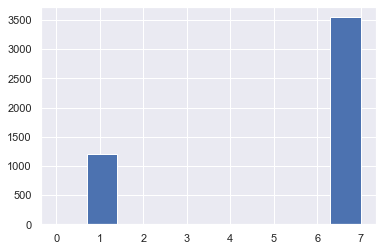

In [62]:
plt.hist(pref_length)

In [63]:
np.bincount(pref_length)

array([   1, 1202,   10,    7,    2,    4,    0, 3546])

In [64]:
zone_file = "/Users/katherinementzer/Documents/sfusd/local_runs/Zones/peng_menu_dist10_maxfrl1_alpha0.1_card0_umodelavg.json"
with open(zone_file, 'r') as f:
    menus = json.load(f)

In [65]:
menus["10210006"]

['729-GE-KG']

In [66]:
1202/len(pref_length)

0.2518860016764459

In [67]:
st.reset_index(inplace=True, drop=True)

In [68]:
st.loc[np.where(pref_length<3)[0], :]

studentno         r1_ranked_idschool  r1_listed_ranks  \
1      10210006  [729, 537, 680, 876, 729]  [1, 2, 3, 4, 5]   
7      10210058  [872, 490, 485, 676, 638]  [1, 2, 3, 4, 5]   
27     10210160                      [676]              [1]   
35     10210205                      [876]              [1]   
36     10210214                 [834, 834]           [1, 2]   
...         ...                        ...              ...   
4748  888009715                        NaN              NaN   
4760  888021277                        NaN              NaN   
4761  888021301                        NaN              NaN   
4763  888021325                        NaN              NaN   
4764  888021434                        NaN              NaN   

                         r1_programs grade  \
1     ['SE', 'SE', 'SE', 'CE', 'GE']    KG   
7     ['GE', 'GE', 'CE', 'GE', 'GE']    KG   
27                            ['GE']    KG   
35                            ['GE']    KG   
36                      ['CB', 'GE']    KG   
...                              ...   ...   
4748                             NaN    KG   
4760                             NaN    KG   
4761                             NaN    KG   
4763                             NaN    KG   
4764                             NaN    KG   

                                        r1_randomnumber  \
1     [0.411758992402522, 0.331974906582103, 0.06240...   
7     [0.644591620997386, 0.36739847366923, 0.596892...   
27                                  [0.275020167277044]   
35                                  [0.413191377737193]   
36              [0.406289813472539, 0.0745083090668423]   
...                                                 ...   
4748                                                NaN   
4760                                                NaN   
4761                                                NaN   
4763                                                NaN   
4764                                                NaN   

               r1_cohortstring  bayview_to_all_ms  brown_ms_to_hs  \
1     ['S;', '', '', '', 'S;']                0.0             0.0   
7       ['S;', '', '', '', '']                0.0             0.0   
27                      ['S;']                0.0             0.0   
35                   ['S;AA;']                0.0             0.0   
36                ['S;', 'S;']                0.0             0.0   
...                        ...                ...             ...   
4748                       NaN                0.0             0.0   
4760                       NaN                0.0             0.0   
4761                       NaN                0.0             0.0   
4763                       NaN                0.0             0.0   
4764                       NaN                0.0             0.0   

      bayview_to_brown_ms  ...  FRL Score  sibling  currentlpsibling  \
1                     0.0  ...   0.660631    [729]                []   
7                     0.0  ...   0.275128    [872]                []   
27                    0.0  ...   0.231886    [676]                []   
35                    0.0  ...   0.189575    [876]                []   
36                    0.0  ...   0.863545    [834]                []   
...                   ...  ...        ...      ...               ...   
4748                  0.0  ...   0.789762    [449]                []   
4760                  0.0  ...   0.747515    [656]                []   
4761                  0.0  ...   0.489812    [525]                []   
4763                  0.0  ...   0.856543       []                []   
4764                  0.0  ...   0.856543    [729]                []   

      currentlp aaprek     aa median_hh_income lowell_ranked sota_ranked  \
1            []     []     []          88594.0             0           0   
7            []     []     []          98438.0             0           0   
27           []     []     []              NaN             0     

In [69]:
menu_sizes = []
for studentno in st.loc[np.where(pref_length<3)[0], :].studentno:
    menu_sizes.append(len(menus[str(studentno)]))

In [70]:
np.mean(menu_sizes)

1.0362737015663643

In [71]:
st.loc[:, "pref_length"] = pref_length

In [72]:
assign = pd.read_csv("/Users/katherinementzer/Documents/sfusd/local_runs/assignments/Assignment_CTIP0_round_merged123_policydist10_maxfrl1_alpha0.1_card0_umodelavghome_based_peng_tiesSTB_iteration0.csv")

In [73]:
st = st.merge(assign, on="studentno")

In [17]:
id2st = dict(zip(st.index, st.studentno))

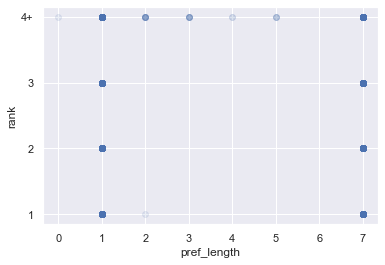

In [75]:
plt.scatter(st["pref_length"], np.clip(st["rank"], a_min=None, a_max=4), alpha=.1)
plt.xlabel("pref_length")
plt.ylabel("rank")
plt.yticks(range(1,5), ["1", "2", "3", "4+"])
plt.show()

In [76]:
print(f"{len(st.loc[np.logical_and(st['rank'] > 3, st['pref_length'] <= 3)]) / len(st.loc[st['rank'] > 3]):.2%}")
len(st.loc[np.logical_and(st["rank"] > 3, st["pref_length"] <= 3)]), len(st.loc[st["rank"] > 3])

12.50%


(234, 1872)

In [77]:
num_eligible = np.load("/Users/katherinementzer/Desktop/num_eligible.npy")

In [78]:
st["num_eligible"] = num_eligible

(array([994.,  21.,  35., 111., 279., 542., 440., 315.,  97.,  66.]),
 array([  1. ,  16.8,  32.6,  48.4,  64.2,  80. ,  95.8, 111.6, 127.4,
        143.2, 159. ]),
 <BarContainer object of 10 artists>)

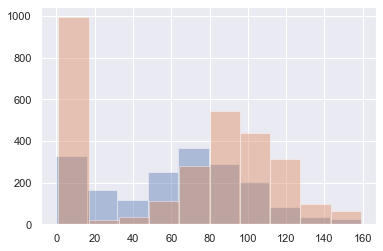

In [79]:
plt.hist(st.loc[st["rank"] >3].num_eligible, alpha=.4)
plt.hist(st.loc[st["rank"] <= 3].num_eligible, alpha=.4)

In [80]:
original_prefs = np.load("/Users/katherinementzer/Desktop/original_utilities.npy")

In [81]:
top3 = original_prefs[:, :3]

In [19]:
prcodes = pd.read_csv("/Users/katherinementzer/Dropbox/SFUSD/Data/program_codes.csv")
pr2id = dict(zip(prcodes["code"], prcodes["index"]))

In [84]:
top3_in_menu = []
top3_ranked = []
for i, t3 in enumerate(top3):
    top3_ranked.append(len(set(t3).intersection(set(prefs[i,:]))))
    menu = [pr2id[x] for x in menus[str(id2st[i])]]
    top3_in_menu.append(len(set(t3).intersection(set(menu))))
    

(array([ 488.,    0.,    0., 1545.,    0.,    0.,  941.,    0.,    0.,
        1798.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

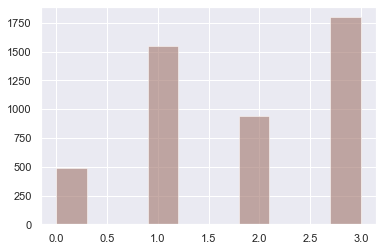

In [85]:
plt.hist(top3_in_menu, alpha=.4)
plt.hist(top3_ranked, alpha=.4)

In [86]:
np.bincount(top3_in_menu)/len(top3_in_menu)

array([0.1022632 , 0.32376362, 0.19719195, 0.37678122])

In [87]:
st.loc[:, "top3_in_menu"] = top3_in_menu

In [88]:
st["rank_top3"] = np.where(st["rank"] > 3, 0, 1)

In [89]:
st.groupby(["top3_in_menu"]).rank_top3.mean()

top3_in_menu
0    0.000000
1    0.731392
2    0.509033
3    0.718020
Name: rank_top3, dtype: float64

In [90]:
min_top3_rank = []
for i, t3 in enumerate(top3):
    min_rank = np.inf
    prefs_set = set(prefs[i,:])

    for t in t3:
        if t in prefs_set:
            min_rank = min(min_rank, np.where(prefs[i, :] == t)[0][0])
    if np.isinf(min_rank):
        min_top3_rank.append(np.nan)
    else:
        min_top3_rank.append(min_rank)
        
# min_top3_rank

In [13]:
mus = np.load("/Users/katherinementzer/Dropbox/SFUSD/Choice_Model/Oct1estimates.npy")
def draw_umodel_randomness_top3():
    utilities = np.array(mus + np.random.gumbel(0, 1, mus.shape))
    original_preferences = np.argsort(-utilities, axis=1) + np.ones(utilities.shape)
    return original_preferences[:, :3]

In [20]:
niters = 100
result = np.zeros((len(st), niters))
for j in range(niters):
    top3_in_menu_sampled = []
    top3_sampled = draw_umodel_randomness_top3()
    for i, t3 in enumerate(top3_sampled):
        menu = [pr2id[x] for x in menus[str(id2st[i])]]
        top3_in_menu_sampled.append(len(set(t3).intersection(set(menu))))
    result[:, j] = top3_in_menu_sampled

In [21]:
np.mean(result, axis=1)

array([2.98, 0.72, 2.47, ..., 3.  , 1.71, 2.52])

([<matplotlib.axis.XTick at 0x7feeff98a390>,
 [Text(0.5, 0, '0'), Text(1.5, 0, '1'), Text(2.5, 0, '2'), Text(3.5, 0, '3')])

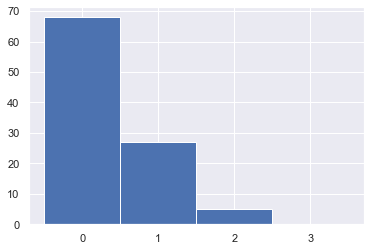

In [22]:
i = np.random.randint(len(st))
plt.hist(result[i,:], bins=range(5))
plt.xticks([x+0.5 for x in range(4)], range(4))

In [23]:
st["avg_top3_in_menu"] = np.mean(result, axis=1)
st["var_top3_in_menu"] = np.var(result, axis=1)

In [51]:
st.groupby("rank_top3").avg_top3_in_menu.mean()

KeyError: 'rank_top3'

(array([ 255.,  144.,  254.,  572.,  726., 1531.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 <BarContainer object of 6 artists>)

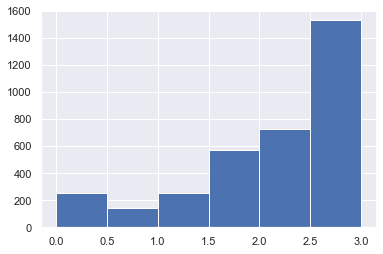

In [52]:
plt.hist(result_nosib.mean(axis=1), bins=[x *.5 for x in range(7)])

(array([ 378.,  840., 2053.,  211.]),
 array([0, 1, 2, 3, 4]),
 <BarContainer object of 4 artists>)

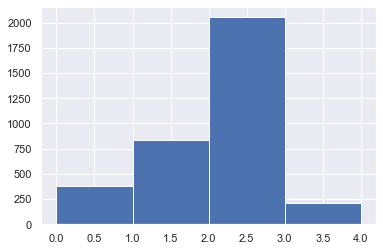

In [105]:
plt.hist(result_nosib.mean(axis=1), bins=range(5))

In [106]:
np.array([ 383.,  863., 2127.,  209.]) / (len(st) - sum(st.preassigned_sib))

array([0.10999426, 0.24784607, 0.61085583, 0.06002298])

In [107]:
np.array([ 383.,  863., 2127.,  209.]).sum()

3582.0

In [283]:
st.loc[:, "lang_match"] = st.homelang_desc.apply(
    lambda x: "cantonese"
    if x == "CC-Chinese Cantonese"
    else ("spanish" if x == "SP-Spanish" else "no_match")
)

In [293]:
tmp = st.loc[st.preassigned_sib == 0].loc[st.avg_top3_in_menu < 1].groupby(
    "lang_match"
).count()[["studentno"]].join(
    st.loc[st.preassigned_sib == 0]
    .groupby("lang_match")
    .count()[["studentno"]],
    rsuffix="_total"
)
tmp["pct_of_group"] = tmp.studentno / tmp.studentno_total
tmp

studentno  studentno_total  pct_of_group
lang_match                                          
cantonese         104              426      0.244131
no_match          189             2664      0.070946
spanish            90              492      0.182927

In [291]:
st.loc[st.preassigned_sib == 0].loc[st.avg_top3_in_menu < 1].groupby(
    "lang_match"
).count()[["studentno"]]/len(st.loc[st.preassigned_sib == 0].loc[st.avg_top3_in_menu < 1])

studentno
lang_match           
cantonese    0.271540
no_match     0.493473
spanish      0.234987

In [ ]:
st.loc[st.preassigned_sib == 0]
    .groupby("lang_match")
    .count()[["studentno"]]

#### Which students don't have any of their top 3 choices on their menu on the typical menu draw? 

In [33]:
student_idxs = np.where(result_nosib.mean(axis=1) < 1)[0]
len(student_idxs)

399

In [34]:
nosib = st.loc[st.preassigned_sib == 0].reset_index()

In [35]:
(
    nosib.loc[student_idxs, ["studentno", "homelang_desc"]]
    .groupby("homelang_desc")
    .count()
    .sort_values("studentno", ascending=False)
    .head()
    / len(student_idxs)
).join(
    st.loc[:, ["studentno", "homelang_desc"]]
    .groupby("homelang_desc")
    .count()
    .sort_values("studentno", ascending=False)
    .head()
    / len(st),
    rsuffix="_avg",
)

studentno  studentno_avg
homelang_desc                                    
EN-English                0.328321       0.521794
CC-Chinese Cantonese      0.265664       0.125943
SP-Spanish                0.208020       0.135163
CM-Chinese Mandarin       0.015038       0.018650
TS-Chinese (Toishanese)   0.012531            NaN

In [36]:
(
    nosib.loc[student_idxs, ["studentno", "homelang_desc", "englprof_desc"]]
    .groupby(["homelang_desc", "englprof_desc"])
    .count()
    .sort_values("studentno", ascending=False)
    .head()
    / len(student_idxs)
).join(
    st.loc[:, ["studentno", "homelang_desc", "englprof_desc"]]
    .groupby(["homelang_desc", "englprof_desc"])
    .count()
    .sort_values("studentno", ascending=False)
    .head()
    / len(st),
    rsuffix="_avg",
)

studentno  studentno_avg
homelang_desc        englprof_desc                              
EN-English           E-English           0.240602       0.390193
CC-Chinese Cantonese P-Pending           0.238095       0.113579
SP-Spanish           P-Pending           0.175439       0.117561
EN-English           P-Pending           0.072682       0.115465
CC-Chinese Cantonese L-Limited English   0.020050            NaN

In [37]:
nosib["frl"] = nosib.reducedlunch_prob + nosib.freelunch_prob
st["frl"] = st.reducedlunch_prob + st.freelunch_prob

In [38]:
nosib.loc[student_idxs, ["ctip1", "frl", "median_hh_income", "speced"]].describe().join(st[["ctip1", "frl", "median_hh_income", "speced"]].describe(), rsuffix="_avg")

ctip1         frl  median_hh_income    ctip1_avg      frl_avg  \
count  391.000000  399.000000        388.000000  4681.000000  4739.000000   
mean     0.107417    0.472851     112050.829897     0.152532     0.468463   
std      0.310039    0.285098      49488.683240     0.359574     0.275923   
min      0.000000    0.000000      13457.000000     0.000000     0.000000   
25%      0.000000    0.244444      82484.750000     0.000000     0.240370   
50%      0.000000    0.504464     106729.000000     0.000000     0.504464   
75%      0.000000    0.698837     147304.750000     0.000000     0.711916   
max      1.000000    1.000000     250001.000000     1.000000     1.000000   

       median_hh_income_avg  
count           4595.000000  
mean          114106.833515  
std            49829.944843  
min            12340.000000  
25%            81793.000000  
50%           107578.000000  
75%           148184.000000  
max           250001.000000

In [53]:
nosib = nosib.merge(student_data[["studentno", "menu_size", "real_menu_size"]], on="studentno", how="left")

In [54]:
nosib.loc[student_idxs, ["menu_size", "real_menu_size"]].describe().join(
    student_data[["menu_size", "real_menu_size"]].describe(), rsuffix="_avg"
)

menu_size  real_menu_size  menu_size_avg  real_menu_size_avg
count  399.000000      399.000000    4739.000000         4739.000000
mean    28.383459       18.791980      81.523950           47.124499
std     23.884896       13.221132      59.592882           34.060163
min      1.000000        1.000000       1.000000            1.000000
25%     13.000000       10.000000       1.000000            1.000000
50%     18.000000       15.000000     104.000000           58.000000
75%     45.000000       28.000000     133.000000           78.000000
max    107.000000       67.000000     158.000000          112.000000

In [79]:
assignment = pd.read_csv("/Users/katherinementzer/Documents/sfusd/local_runs/assignments/Assignment_CTIP0_round_merged0_policydist10_maxfrl1_alpha0.5_card0_umodelavghome_based_peng_tiesSTB_iteration0.csv")
nosib = nosib.merge(assignment[["studentno", "assigned_utility"]], how="left", on="studentno")
# student_data = student_data.merge(assignment[["studentno", "assigned_utility"]], how="left", on="studentno")

In [65]:
student_data["type"] = student_data.apply(lambda row: f"{row.lang_match}-{row.census_blockgroup}", axis=1)
student_data["type_code"] = student_data["type"].apply(lambda x: def2type[x] if x in def2type else np.nan)
counts = pd.read_csv("/Users/katherinementzer/code/optimal-allocation-sfusd/data/klm_raw_inputs/geocode_student_counts.csv")
type_code2count = dict(zip(counts.type_code, counts.student_count))
student_data["num_with_same_menu"] = student_data.type_code.apply(lambda x: type_code2count[x] if x in type_code2count else np.nan)
nosib = nosib.merge(student_data[["studentno", "num_with_same_menu"]], on="studentno", how="left")

In [80]:
nosib.loc[student_idxs, ["assigned_utility", "num_with_same_menu"]].describe().join(
    student_data[["assigned_utility", "num_with_same_menu"]].describe(), rsuffix="_avg"
)

assigned_utility  num_with_same_menu  assigned_utility_avg  \
count        292.000000          399.000000           4549.000000   
mean          -5.162488            2.661654             -1.897135   
std            3.927887            2.291191              3.300026   
min          -31.620661            1.000000            -31.620661   
25%           -6.663081            1.000000             -3.260387   
50%           -4.489529            2.000000             -1.571542   
75%           -3.126020            3.000000              0.071986   
max            4.581703           10.000000             11.630234   

       num_with_same_menu_avg  
count             4643.000000  
mean                 6.262115  
std                  5.862602  
min                  1.000000  
25%                  3.000000  
50%                  5.000000  
75%                  8.000000  
max                 48.000000

In [77]:
student_data.assigned_utility #drop(columns=['assigned_utility_x', 'assigned_utility_y', "type_idx"], inplace=True)

0       -2.247308
1        0.513275
2       -4.058045
3        2.894684
4       -3.387548
          ...    
4734          NaN
4735    -5.502556
4736   -10.407232
4737    -1.466610
4738    -3.750848
Name: assigned_utility, Length: 4739, dtype: float64

In [78]:
nosib.assigned_utility

AttributeError: 'DataFrame' object has no attribute 'assigned_utility'

In [29]:
result_nosib = result[~np.array(st.preassigned_sib, dtype=bool), :]

(array([821., 412., 400., 421., 505., 489., 372., 136.,  22.,   4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

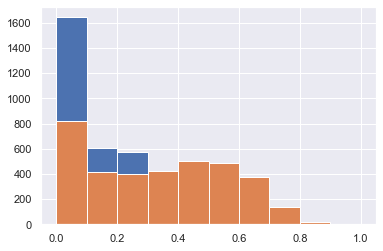

In [200]:
plt.hist(result.var(axis=1), bins=[x *.1 for x in range(11)])
plt.hist(result_nosib.var(axis=1), bins=[x *.1 for x in range(11)])

In [168]:
st[["avg_top3_in_menu", "var_top3_in_menu"]].head(15)

avg_top3_in_menu  var_top3_in_menu
0               2.88            0.1056
1               0.53            0.2491
2               2.18            0.4676
3               2.72            0.2216
4               2.98            0.0196
5               2.55            0.2875
6               2.46            0.4084
7               0.44            0.2464
8               2.99            0.0099
9               1.55            0.7475
10              2.23            0.5571
11              1.13            0.5131
12              2.37            0.3531
13              2.28            0.4016
14              2.91            0.0819

In [27]:
siblings = pd.read_csv("klm_raw_inputs/preassigned_siblings.csv")
st["preassigned_sib"] = st.studentno.apply(lambda x: 1 if x in list(siblings.studentno) else 0)

In [28]:
st.preassigned_sib.sum()

1290

In [185]:
st.groupby("preassigned_sib")[["rank", "rank_top3", "avg_top3_in_menu"]].mean()

rank  rank_top3  avg_top3_in_menu
preassigned_sib                                        
0                30.257398   0.533780          2.171764
1                 3.200000   0.830252          0.842353

In [190]:
len(st.loc[st.preassigned_sib == 1].loc[st.rank_top3 == 0]) / len(st)

0.04233025984911987

In [191]:
np.bincount(st.loc[st.preassigned_sib == 0].top3_in_menu)

array([ 290,  556,  941, 1795])

In [213]:
top3

array([[ 80.,  71.,  57.],
       [ 92.,  49.,  93.],
       [ 23.,  76., 127.],
       ...,
       [ 24., 112.,  49.],
       [  5., 155.,  59.],
       [  6.,  31.,  80.]])

In [264]:
np.argsort(-(np.bincount(np.array(top3[:,0], dtype=int))))# / np.append([1], pr.capacity.to_numpy())))

array([ 24, 136,  76, 111,  74, 134,  49, 117,   1,  90, 155, 127, 128,
       159,   7,  61,  69,  87,  37,  25,   3,   5, 147,  62, 146, 101,
       132, 150,  46, 158,  88, 103,  11,  20,  72, 140, 153,  22,  48,
       151,   6, 124, 142,  94,  73,  93,  92, 156, 154,  84,  71,  12,
        80,  14, 145,  23, 123,  34,  40, 107,  98,  19,  65,  85,  77,
        51, 143,  35, 152,  28, 112, 102, 113,  97,  39,  29, 108, 121,
        86,  41,  59,  31,  83, 122,  64, 115,  18,  17,  95, 104, 105,
        82,   8,  15,  52,  26,  57, 139,  96, 138, 106,   9, 118,  45,
       130, 149, 125,  56,  30,  53,  32, 148, 129,  27, 120,  44, 131,
        99, 116,  66,  43,  60, 126, 109, 137,  13,  54, 133,  79,  10,
        55, 100,  89,  75,  58, 135,  78,  63,  36,  33, 114,  16,  38,
         4,   2, 157,  21,  42, 144,  50, 119, 141,  67,  68,  70,  81,
        91, 110,  47,   0])

In [257]:
d= dict(zip(range(160), np.bincount(np.array(top3[:, 0], dtype=int).flatten())))
d

{0: 0,
 1: 101,
 2: 0,
 3: 66,
 4: 0,
 5: 64,
 6: 38,
 7: 85,
 8: 13,
 9: 11,
 10: 2,
 11: 43,
 12: 32,
 13: 3,
 14: 31,
 15: 13,
 16: 0,
 17: 15,
 18: 15,
 19: 26,
 20: 42,
 21: 0,
 22: 41,
 23: 28,
 24: 197,
 25: 72,
 26: 13,
 27: 7,
 28: 22,
 29: 18,
 30: 9,
 31: 16,
 32: 9,
 33: 0,
 34: 27,
 35: 24,
 36: 0,
 37: 75,
 38: 0,
 39: 19,
 40: 27,
 41: 17,
 42: 0,
 43: 4,
 44: 7,
 45: 11,
 46: 48,
 47: 0,
 48: 39,
 49: 109,
 50: 0,
 51: 25,
 52: 13,
 53: 9,
 54: 3,
 55: 2,
 56: 10,
 57: 13,
 58: 1,
 59: 16,
 60: 3,
 61: 81,
 62: 59,
 63: 1,
 64: 15,
 65: 26,
 66: 5,
 67: 0,
 68: 0,
 69: 77,
 70: 0,
 71: 33,
 72: 42,
 73: 35,
 74: 149,
 75: 2,
 76: 170,
 77: 26,
 78: 1,
 79: 2,
 80: 31,
 81: 0,
 82: 13,
 83: 16,
 84: 33,
 85: 26,
 86: 17,
 87: 75,
 88: 45,
 89: 2,
 90: 100,
 91: 0,
 92: 34,
 93: 35,
 94: 36,
 95: 14,
 96: 12,
 97: 19,
 98: 27,
 99: 5,
 100: 2,
 101: 54,
 102: 22,
 103: 43,
 104: 14,
 105: 13,
 106: 11,
 107: 27,
 108: 18,
 109: 3,
 110: 0,
 111: 149,
 112: 22,
 113: 19,
 

In [271]:
dict(zip(range(160), np.bincount(np.array(top3[:,0], dtype=int))/ np.append([1], pr.capacity.to_numpy())))

{0: 0.0,
 1: 1.0520833333333333,
 2: 0.0,
 3: 1.375,
 4: 0.0,
 5: 3.5555555555555554,
 6: 1.4615384615384615,
 7: 0.9239130434782609,
 8: 0.5416666666666666,
 9: 0.5,
 10: 0.5,
 11: 1.5925925925925926,
 12: 0.8205128205128205,
 13: 0.13636363636363635,
 14: 0.4305555555555556,
 15: 0.2708333333333333,
 16: 0.0,
 17: 0.3,
 18: 0.3409090909090909,
 19: 1.1818181818181819,
 20: 1.75,
 21: 0.0,
 22: 1.5185185185185186,
 23: 0.717948717948718,
 24: 4.4772727272727275,
 25: 2.1176470588235294,
 26: 1.3,
 27: 3.5,
 28: 1.0,
 29: 0.45,
 30: 0.18,
 31: 0.3333333333333333,
 32: 0.18,
 33: 0.0,
 34: 1.0,
 35: 0.6153846153846154,
 36: 0.0,
 37: 0.78125,
 38: 0.0,
 39: 0.3958333333333333,
 40: 1.5,
 41: 0.6538461538461539,
 42: 0.0,
 43: 0.4444444444444444,
 44: 0.5384615384615384,
 45: 0.4583333333333333,
 46: 1.0,
 47: 0.0,
 48: 1.7727272727272727,
 49: 1.5138888888888888,
 50: 0.0,
 51: 0.3472222222222222,
 52: 0.5909090909090909,
 53: 0.375,
 54: 0.3333333333333333,
 55: 0.15384615384615385,
 5

In [222]:
id2pr = dict(zip(prcodes["index"], prcodes["code"]))

In [265]:
popular = [24, 136,  76, 111,  74] # most number of first ranks (raw counts, per seat inflated popularity of sped)
for i in popular:
    print(id2pr[i], d[i])

478-GE-KG 197
750-GE-KG 180
479-GE-KG 170
569-GE-KG 149
676-GE-KG 149


In [267]:
popular_top3 = []
for i, t3 in enumerate(top3):
#     menu = [pr2id[x] for x in menus[str(id2st[i])]]
#     popular_top3.append(int(24 in t3))
    popular_top3.append(len(set(t3).intersection(set(popular))))

In [268]:
st["popular_top3"] = popular_top3

In [269]:
st.loc[st.preassigned_sib == 0].groupby("popular_top3").mean()[
    ["rank", "rank_top3"]
].join(
    st.loc[st.preassigned_sib == 0]
    .groupby("popular_top3")
    .count()[["studentno"]]
)

rank  rank_top3  studentno
popular_top3                                 
0             25.529353   0.597090       1993
1             34.823002   0.486134       1226
2             39.815789   0.359649        342
3             56.761905   0.142857         21

In [259]:
pr.iloc[[x -1 for x in [24, 136,  76, 111,  74]]]

Unnamed: 0 program_id  school_id program_type  capacity  r2_capacity  \
23           23  478-GE-KG        478           GE        44         43.0   
135         135  750-GE-KG        750           GE        66         64.0   
75           75  479-GE-KG        479           GE        66         66.0   
110         110  569-GE-KG        569           GE        48         44.0   
73           73  676-GE-KG        676           GE        66         64.0   

     r3_capacity  r1_assigned  r1_noenroll  r1_first_choice  max_seats  
23          44.0         44.0          6.0            121.0       48.0  
135         64.0         66.0          6.0            169.0       72.0  
75          66.0         66.0         16.0            176.0       48.0  
110         44.0         48.0         15.0            147.0       24.0  
73          64.0         66.0          7.0            155.0       48.0

In [272]:
st.loc[st.preassigned_sib == 0].groupby("rank_top3").mean()[
    ["rank", "popular_top3"]
].join(
    st.loc[st.preassigned_sib == 0]
    .groupby("rank_top3")
    .count()[["studentno"]]
)

rank  popular_top3  studentno
rank_top3                                    
0          63.088024      0.671856       1670
1           1.582113      0.445084       1912

In [279]:
st.pivot_table(index="rank_top3", columns="popular_top3", values="studentno", aggfunc="count")

popular_top3     0    1    2   3
rank_top3                       
0              954  670  228  20
1             1735  953  204   8

In [294]:
248/len(st)

0.051969823973176864